In [119]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np

#load raw CSV into pandas dataframe
ds = pd.read_csv('orders_nov25.csv', sep='\t', lineterminator='\n', header=None)

#manually balance data to include 1's and 0's for true labels in near equal amounts
ones = ds[ds[29]==1]
zeros = ds[ds[29]==0][:4300]

#combine the two sub-dataframes into a single dataframe
df = pd.concat([ones,zeros],ignore_index=True)

#shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

#Use 28 features (excluding the 29th feature in this case) and the final column are true labels.
X = df.iloc[:, 0:28].values
Y = df.iloc[:, 29].values

In [160]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0,0.0,0,0.000000,0,0,0,0.0,0,...,0.0,0,0.000000,0,0.0,0,0,0,512,0
1,0.0,0,0.0,0,96.166911,1,0,0,0.0,0,...,0.0,0,0.000000,0,0.0,0,0,0,297,0
2,0.0,0,0.0,0,0.000000,0,55,1,0.0,0,...,0.0,0,0.000000,0,0.0,0,0,0,851,1
3,0.0,0,0.0,0,88.568027,1,0,0,0.0,0,...,0.0,0,0.000000,0,0.0,0,0,0,442,0
4,0.0,0,0.0,0,0.000000,0,0,0,0.0,0,...,0.0,0,93.857269,1,0.0,0,0,0,16,0


In [121]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=42)

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler().fit(X_Train)
X_T = sc_X.transform(X_Train)
X_E = sc_X.transform(X_Test)

In [122]:
print((X_T.shape,Y_Train.shape))
print((X_E.shape, Y_Test.shape))

((6860, 28), (6860,))
((1716, 28), (1716,))


In [161]:
model = Sequential()
model.add(Dense(24, input_dim=28, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_T,Y_Train,epochs=100,batch_size=64)

score = model.evaluate(X_E, Y_Test, batch_size=64)

Epoch 1/100
6860/6860 [==============================] - 1s 212us/step - loss: 0.6425 - acc: 0.6302
Epoch 2/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5545 - acc: 0.7446
Epoch 3/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5338 - acc: 0.7512
Epoch 4/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5257 - acc: 0.7560
Epoch 5/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5208 - acc: 0.7596
Epoch 6/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5175 - acc: 0.7595
Epoch 7/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5148 - acc: 0.7612
Epoch 8/100
6860/6860 [==============================] - 0s 28us/step - loss: 0.5133 - acc: 0.7609
Epoch 9/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5116 - acc: 0.7606
Epoch 10/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.5105 - acc: 0.7630
Epoch 11

6860/6860 [==============================] - 0s 28us/step - loss: 0.4857 - acc: 0.7726
Epoch 84/100
6860/6860 [==============================] - 0s 28us/step - loss: 0.4848 - acc: 0.7726
Epoch 85/100
6860/6860 [==============================] - 0s 32us/step - loss: 0.4850 - acc: 0.7735
Epoch 86/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.4856 - acc: 0.7745
Epoch 87/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.4858 - acc: 0.7741
Epoch 88/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.4852 - acc: 0.7735
Epoch 89/100
6860/6860 [==============================] - 0s 27us/step - loss: 0.4856 - acc: 0.7758
Epoch 90/100
6860/6860 [==============================] - 0s 28us/step - loss: 0.4847 - acc: 0.7726
Epoch 91/100
6860/6860 [==============================] - 0s 29us/step - loss: 0.4853 - acc: 0.7724
Epoch 92/100
6860/6860 [==============================] - 0s 30us/step - loss: 0.4846 - acc: 0.7719
Epoch 93/100


In [162]:
from sklearn.metrics import confusion_matrix
yhat = model.predict_classes(X_E)
matrix = confusion_matrix(Y_Test,yhat)
print(matrix)
tn, fp, fn, tp = matrix.ravel()
error_rate = (fp+fn)/(tn+tp+fn+fp)
recall = tp/(tp+fn)
specifity = tn/(tn+fp)
precision = tp/(tp+fp)
print('error rate: ' + str(error_rate),
      'recall: ' + str(recall),
      'specifity: ' + str(specifity),
      'precision: ' + str(precision))

[[722 152]
 [236 606]]
error rate: 0.2261072261072261 recall: 0.7197149643705463 specifity: 0.8260869565217391 precision: 0.7994722955145118


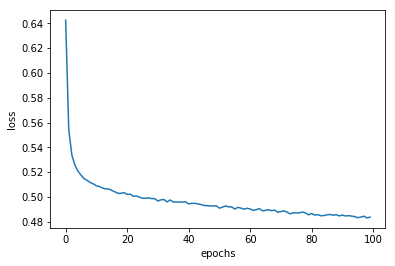

In [163]:
import matplotlib.pyplot as plt
plt.plot(model.history.epoch, model.history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()